# Prepare data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

from preparation import prepare_data, select_by_date_interval
from plotting import h_bar_plot, get_videos_per_h, month_bar_plot, get_videos_per_month

In [2]:
plt.rcParams['figure.dpi'] = 150 # make your graphs bigger
style.use('seaborn') # apply style for your plot. Hard to read letters in pie charts if style isn't suitable

In [3]:
PATH = "C:/Users/San/Documents/CS projects/yt_activity_analysis/data/Takeout/YouTube and YouTube Music/history/watch-history.json"
df = prepare_data(PATH)

# start_date = "2022-08-01"
# end_date = "2022-09-30"
# df = select_by_date_interval(df0, start=start_date)
df

,video_title,channel_name,time
0,"Марш Українського війська ""Зродились ми велико...",Ser General,2022-09-19 16:18:28.457000+03:00
1,Смех Смех старого испанца,Руслан Горчак,2022-09-19 16:10:24.479000+03:00
2,Windows Task Manager | Complete Tutorial for B...,Chris' Tutorials,2022-09-19 16:07:11.115000+03:00
3,"Тихо прийшов, тихо пішов або пісня спеціальног...",Riffmaster - Topic,2022-09-19 16:02:23.694000+03:00
4,🔴 Херсонський мішок для окупантів / Захід вже ...,Цензор.НЕТ,2022-09-19 15:35:15.737000+03:00
...,...,...,...
1886,КОМУ ВНИЗ - Марш артилерії,КОМУ ВНИЗ,2022-08-01 10:20:15.307000+03:00
1887,Putin is Gaslighting the World,Jake Broe,2022-08-01 10:07:48.419000+03:00
1888,The Worst Thing The Russian Military Has Ever ...,Speak The Truth,2022-08-01 09:47:43.844000+03:00
1889,Racing to get my armour ready,Lindybeige,2022-08-01 09:46:35.620000+03:00


# Count on how many videos you clicked per channel

In [4]:
counts = df["channel_name"].value_counts()
counts

STERNENKO                   52
Історія Без Міфів           50
КОМУ ВНИЗ                   38
gameranx                    32
Цензор.НЕТ                  32
                            ..
Mystical Reaper              1
RedEffect                    1
South China Morning Post     1
Радіо Свобода                1
SirBoyah                     1
Name: channel_name, Length: 581, dtype: Int64

# Break into categories

In [5]:
bins = [0, 1, 5, 10, 20, 50, np.inf]
names = ['1', '2-5', '6-10', '11-20', '21-50', ">50"]

intervals = pd.cut(counts, bins, labels=names)

df2 = pd.DataFrame({"video_count": counts, "interval": intervals})
df2

,video_count,interval
STERNENKO,52,>50
Історія Без Міфів,50,21-50
КОМУ ВНИЗ,38,21-50
gameranx,32,21-50
Цензор.НЕТ,32,21-50
...,...,...
Mystical Reaper,1,1
RedEffect,1,1
South China Morning Post,1,1
Радіо Свобода,1,1


# Plot percentage of categories

In [6]:
interval_count = df2["interval"].value_counts()
percentage = interval_count/len(df2)
percentage

1        0.600688
2-5      0.261618
6-10     0.074010
11-20    0.036145
21-50    0.025818
>50      0.001721
Name: interval, dtype: float64

<AxesSubplot:ylabel='interval'>

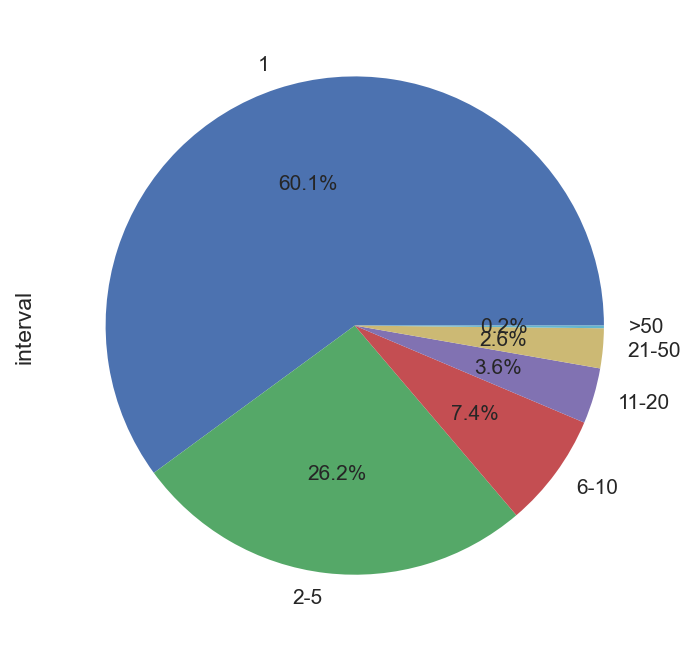

In [7]:
percentage.plot.pie(autopct='%1.1f%%')

# Plot n most watched channels

632

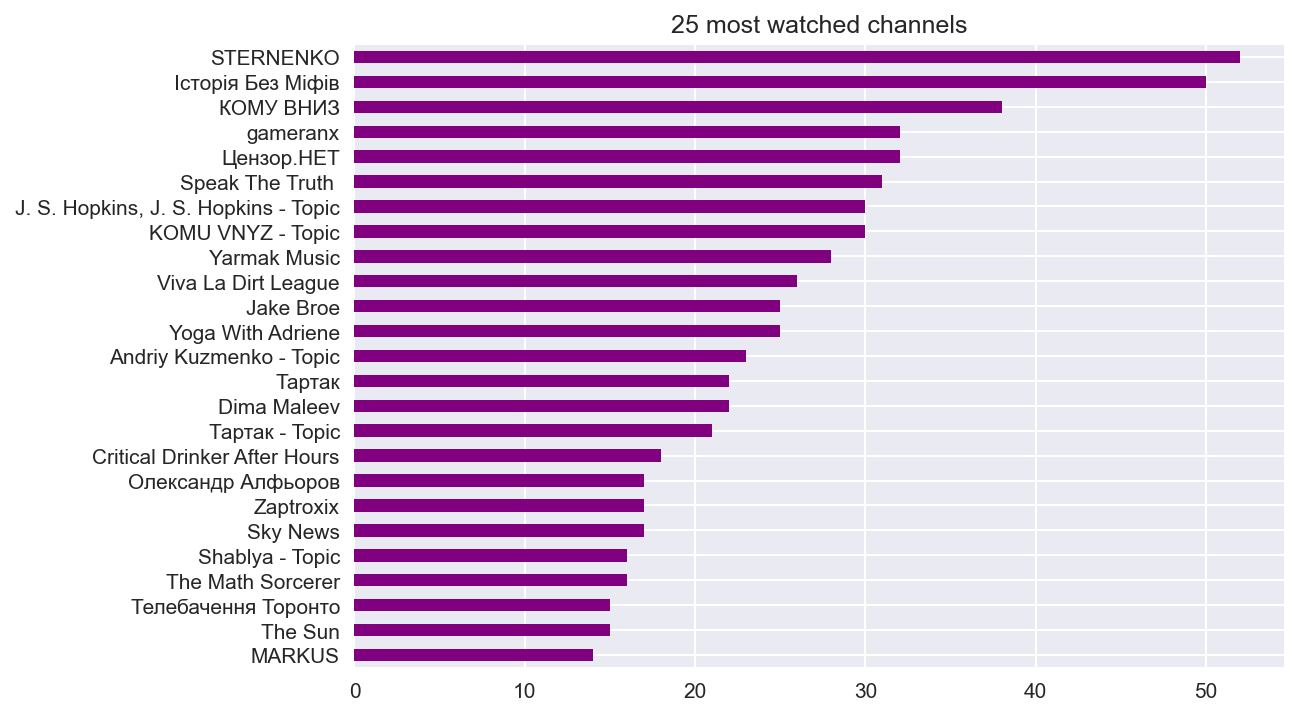

In [8]:
n = 25
top_n_channels = counts.iloc[:n]
ax = top_n_channels.plot(kind="barh", color="purple", title=f"{n} most watched channels")
ax.invert_yaxis()
sum(top_n_channels)

# Count on how many videos you clicked per hour

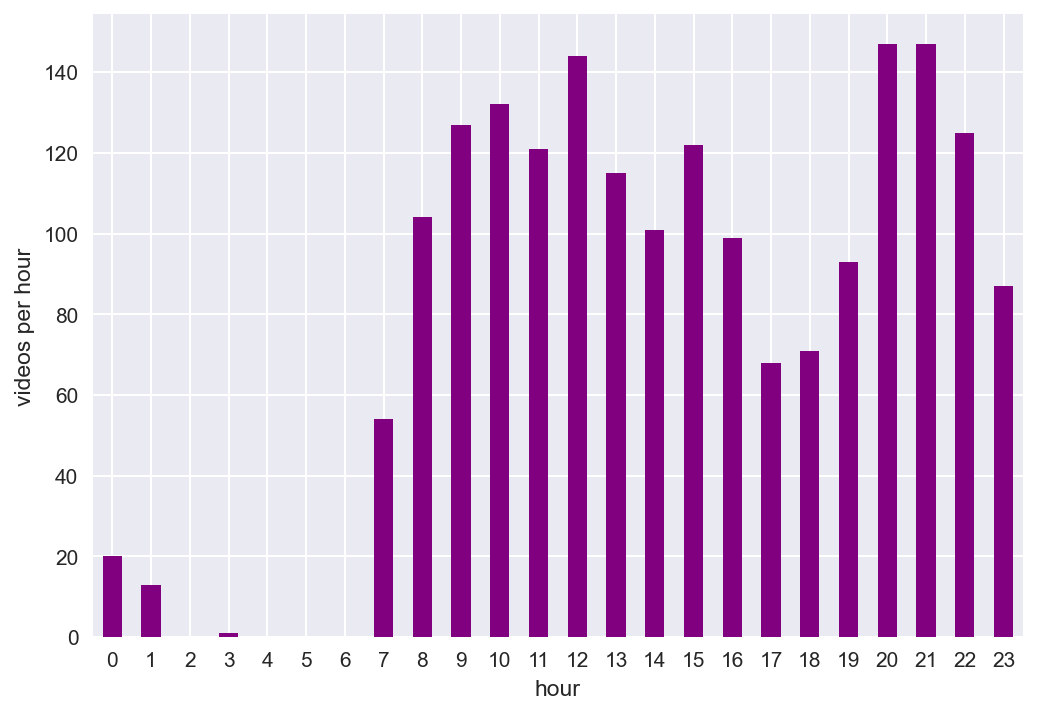

In [9]:
h_bar_plot(df)

# Discover at what hours you watch a particular channel 

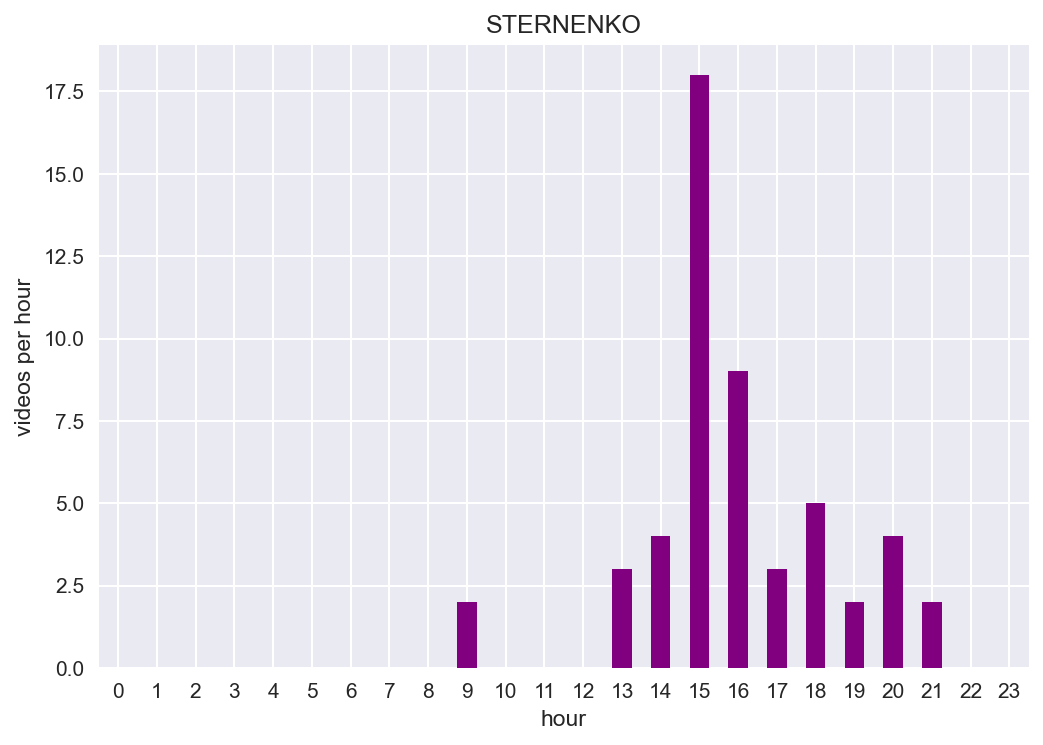

In [10]:
channel_name_to_look = "STERNENKO"
h_bar_plot(df, channel_name_to_look)

# Plot videos count per hour for several channels

In [11]:
list_top_n_channels = top_n_channels.index.to_list()
list_top_n_channels[:10]

['STERNENKO',
 'Історія Без Міфів',
 'КОМУ ВНИЗ',
 'gameranx',
 'Цензор.НЕТ',
 'Speak The Truth ',
 'J. S. Hopkins, J. S. Hopkins - Topic',
 'KOMU VNYZ - Topic',
 'Yarmak Music',
 'Viva La Dirt League']

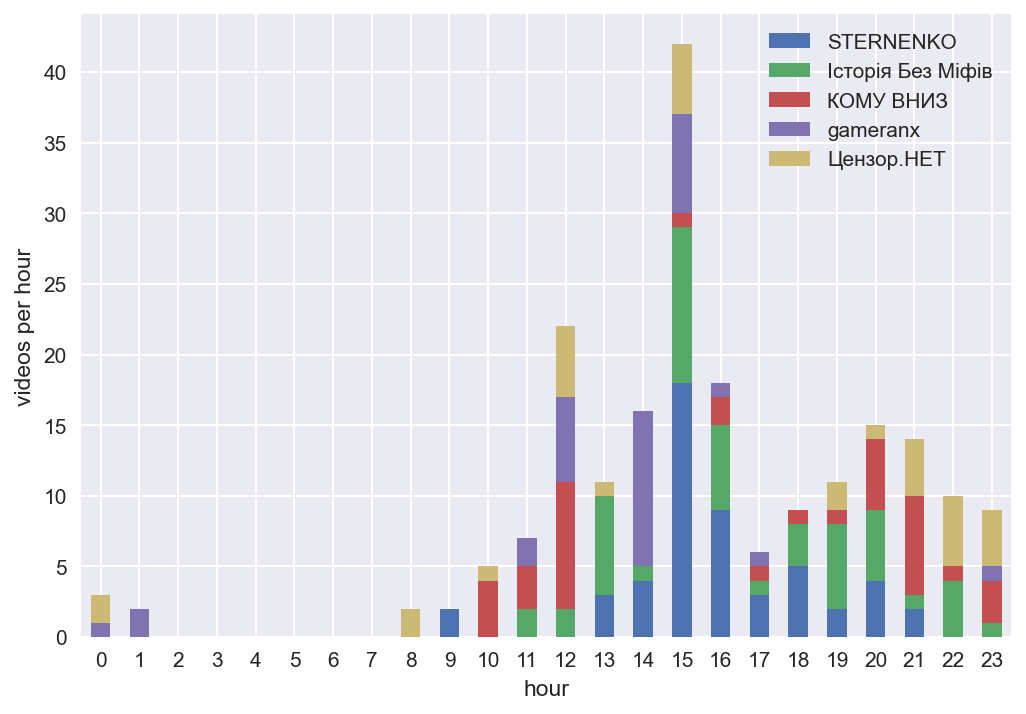

In [12]:
start_point = 0
interval = 5
end_point = start_point + interval

df_data = {f"{list_top_n_channels[start_point]}": get_videos_per_h(
    df, list_top_n_channels[start_point])}
df_top_n_channels = pd.DataFrame(data=df_data)
for i in range(start_point+1, end_point):
    df_top_n_channels[list_top_n_channels[i]] = get_videos_per_h(
        df, list_top_n_channels[i])
df_top_n_channels
df_top_n_channels.plot.bar(stacked=True, rot=0,
                           xlabel="hour", ylabel="videos per hour").legend(bbox_to_anchor=(1,1))

# Count how many videos you click per day of week

C:\Users\San\AppData\Local\Temp\ipykernel_10924\267179306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['time'].dt.strftime('%a')


<AxesSubplot:>

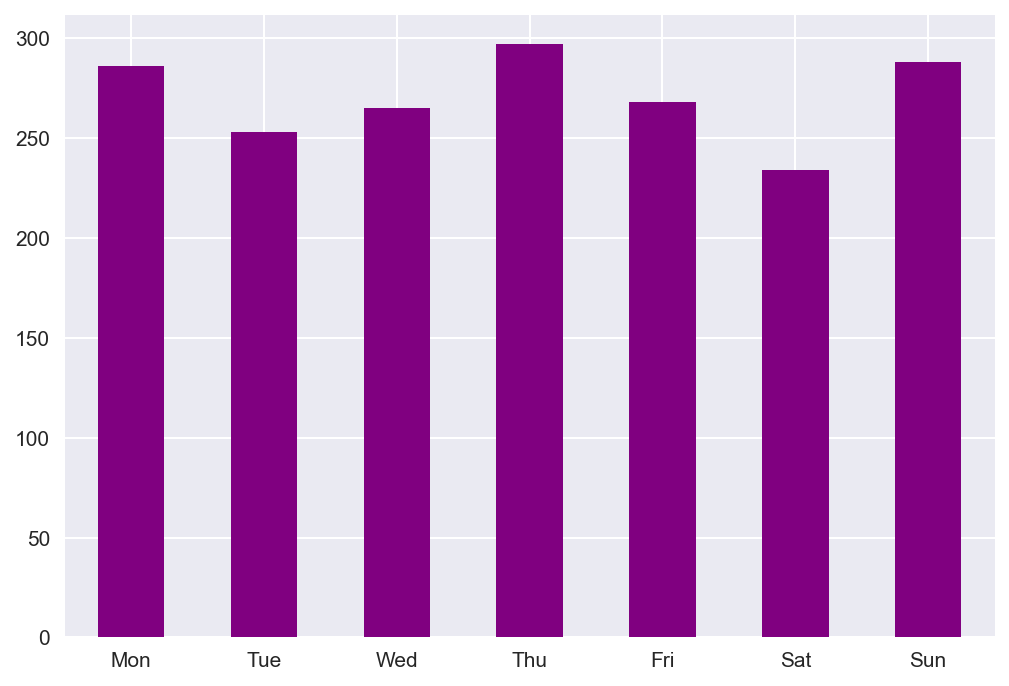

In [13]:
df['weekday'] = df['time'].dt.strftime('%a')
total = len(df["weekday"])
str_week_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
videos_per_weekday = df["weekday"].value_counts()[str_week_days] # sort with custom index
videos_per_weekday.plot.bar(color="purple", rot=0)

# Change in use of a particular channel over months (Use all data for this!)

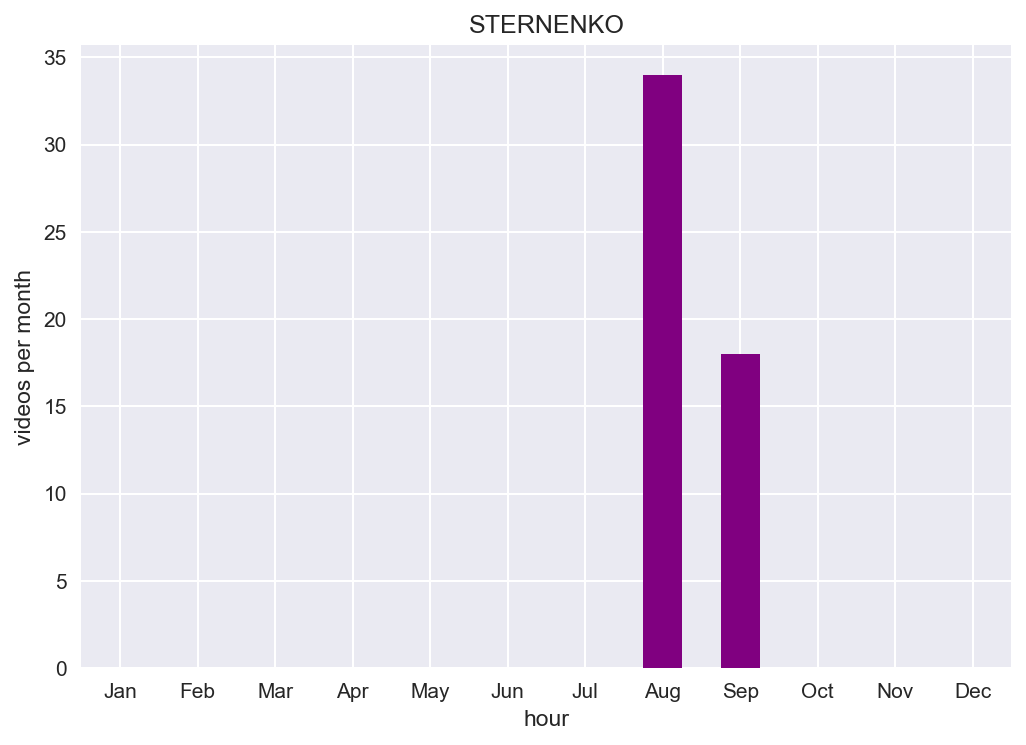

In [14]:
channel_name = "STERNENKO"
month_bar_plot(df, channel_name)